In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random

#reading file
my_file = pd.read_csv('D:\\term8\\DL\\HW\\HW1\\Question3.csv', header = None)
X = my_file[0]
Y = my_file[1]
x1 = []
y1 = []
x2 = []
y2 = []
target_ = my_file[2]
for i in range(len(target_)):
    if target_[i] == 0:
        target_[i] = -1
        x1.append(X[i])
        y1.append(Y[i])
    elif target_[i] == 1:
        x2.append(X[i])
        y2.append(Y[i])

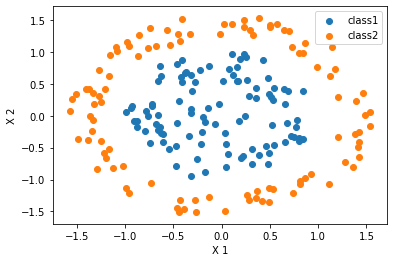

In [2]:
def plot_datas(x1,y1,x2,y2):
    plt.scatter(x1, y1, label='class1')
    plt.scatter(x2, y2, label='class2')
    plt.xlabel('X 1')
    plt.ylabel('X 2')
    plt.legend()
    plt.show()
    
plot_datas(x1,y1,x2,y2)

In [3]:
def plot_classes_with_lines(w,b,num_of_nodes):
    plt.scatter(x1, y1, label='class1')
    plt.scatter(x2, y2, label='class2')
    plt.xlabel('X 1')
    plt.ylabel('X 2')
    
    x = np.linspace(-2,2,100)
    for i in range(num_of_nodes):
        y = (-w[i]*x -b[i])/w[i+num_of_nodes]
        plt.plot(x,y, label = str(i+1))
    plt.legend()
    plt.ylim([-3, 3])
    plt.show()

In [4]:
#Madaline - MRI
def MRI(num_of_nodes, learning_rate_, epochs_):
    learning_rate = learning_rate_
    random.seed(1)
    w = []
    b = []
    #initializing weights
    for i in range(2*num_of_nodes):
        w.append(random.random())
    for i in range(num_of_nodes):
        b.append(random.random())
        
    #shuffling and my final variables will be X1, X2 & target
    X1_ = np.concatenate([x1, x2])
    X2_ = np.concatenate([y1, y2])
    shuffler = np.random.permutation(len(target_))
    X1 = X1_[shuffler]
    X2 = X2_[shuffler]
    target = target_[shuffler]
    
    def mysign(x):
        if x >= 0: 
            return 1
        else:
            return -1
        
    #step 4 OK
    def calculate_net(i, node_num):
        return w[node_num-1]*X1[i] + w[node_num-1+num_of_nodes]*X2[i] + b[node_num-1]

    #step 5
    def hidden_layer_output(i, node_num):
            return mysign(calculate_net(i, node_num))

    #step 6 (or)
    def net_output(i):
        for j in range(num_of_nodes):
            if hidden_layer_output(i, j+1) == 1:
                return 1
        return -1

    #step 7
    epochs = 0
    while epochs != epochs_:
        
        #shuffling datas on every epoch
        X1_ = np.concatenate([x1, x2])
        X2_ = np.concatenate([y1, y2])
        shuffler = np.random.permutation(len(target_))
        X1 = X1_[shuffler]
        X2 = X2_[shuffler]
        target = target_[shuffler]
        
        epochs += 1
        for i in range(len(target)):
            if target[i] == net_output(i):
                continue

            if target[i] == 1:
                Z_f = 0
                Z_f_net = 10**9 #large number
                for j in range(num_of_nodes):
                    j =j+1
                    if np.abs(calculate_net(i, j)) < Z_f_net:
                        Z_f_net = np.abs(calculate_net(i, j))
                        Z_f = j
                net = calculate_net(i, Z_f)
                b[Z_f-1] += learning_rate*(1 - net)
                w[Z_f-1] += learning_rate*(1 - net)*X1[i]
                w[Z_f-1+num_of_nodes] += learning_rate*(1 - net)*X2[i]
                
            if target[i] == -1:
                for j in range(num_of_nodes):
                    j += 1
                    if np.abs(calculate_net(i, j)) > 0:
                        
                        net = calculate_net(i, j)
                        b[j-1] += learning_rate*(-1 - net)
                        w[j-1] += learning_rate*(-1 - net)*X1[i]
                        w[j-1+num_of_nodes] += learning_rate*(-1 - net)*X2[i]
    return w, b

### with 3 nodes! not working good!

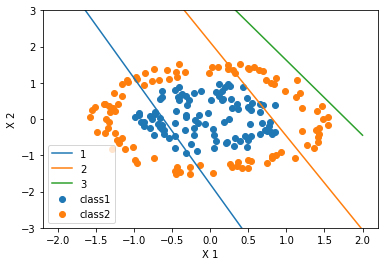

line 1 :
w_x: -0.05139376737402827 w_y: -0.01759090306227685
bias: -0.031671180685982625
line 2 :
w_x: 0.41095910737201385 w_y: 0.15890725212262924
bias: -0.33605025286838486
line 3 :
w_x: 0.3551422753011013 w_y: 0.171935916121796
bias: -0.6337385212525072


In [5]:
#working in learning rate of 0.0001 and epochs of 150
num_of_nodes = 3
learning_rate = 0.0001
epochs = 150
w, b = MRI(num_of_nodes, learning_rate, epochs)
plot_classes_with_lines(w, b, num_of_nodes)
for i in range(num_of_nodes):
    print('line',str(i+1),':')
    print('w_x:', w[i],'w_y:', w[i+num_of_nodes])
    print('bias:', b[i])

### with 4 nodes, kind of working!

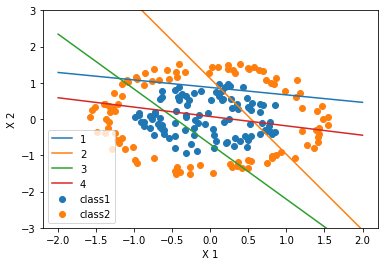

line 1 :
w_x: 0.06180769975291505 w_y: 0.30011497577794893
bias: -0.26219941585681344
line 2 :
w_x: 0.6658028986321027 w_y: 0.3185609415923811
bias: -0.3557209589707446
line 3 :
w_x: 0.5477744939624898 w_y: 0.36070057805079864
bias: 0.25035672735194936
line 4 :
w_x: 0.13624515783690164 w_y: 0.5275172595523254
bias: -0.0377404470123518


In [6]:
#working in learning rate of 0.00004 and epochs of 120
num_of_nodes = 4
learning_rate = 0.00004
epochs = 120
w, b = MRI(num_of_nodes, learning_rate, epochs)
plot_classes_with_lines(w, b, num_of_nodes)
for i in range(num_of_nodes):
    print('line',str(i+1),':')
    print('w_x:', w[i],'w_y:', w[i+num_of_nodes])
    print('bias:', b[i])

### with 8 nodes! just 3 lines working!

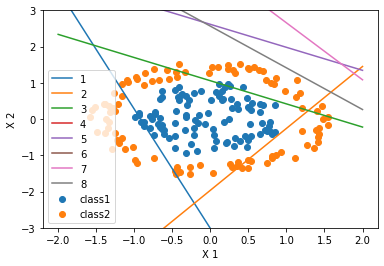

line 1 :
w_x: -0.29541195095542405 w_y: -0.08974442896306746
bias: -0.27074570950990784
line 2 :
w_x: 0.2726126214913107 w_y: -0.1596169284307825
bias: -0.3135870526765741
line 3 :
w_x: 0.2277441647647314 w_y: 0.35613778761108955
bias: -0.3769824892582685
line 4 :
w_x: 0.054443016046891904 w_y: 0.13526867186117258
bias: -0.706513739133934
line 5 :
w_x: 0.18368401092637893 w_y: 0.28930757059078605
bias: -0.7565312156800479
line 6 :
w_x: 0.09166743764256115 w_y: -0.08354415451687751
bias: -0.5202763012876961
line 7 :
w_x: 0.15212342374233892 w_y: 0.09677293831293869
bias: -0.40913830462343626
line 8 :
w_x: 0.29757222991220367 w_y: 0.25865992770530455
bias: -0.6633134444976649


In [7]:
#working in learning rate of 0.00004 and epochs of 450
num_of_nodes = 8
learning_rate = 0.00004
epochs = 450
w, b = MRI(num_of_nodes, learning_rate, epochs)
plot_classes_with_lines(w, b, num_of_nodes)
for i in range(num_of_nodes):
    print('line',str(i+1),':')
    print('w_x:', w[i],'w_y:', w[i+num_of_nodes])
    print('bias:', b[i])

## Testing code

### test1: XOR

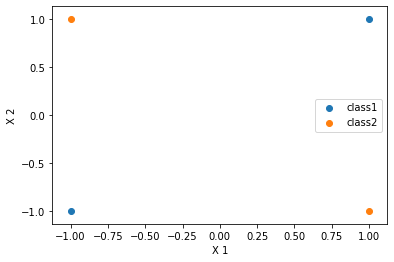

In [14]:
#XOR
x1 = np.array([1,-1])
y1 = np.array([1,-1])
x2 = np.array([1,-1])
y2 = np.array([-1,1])
target_ = np.array([-1,-1,1,1])
plot_datas(x1,y1,x2,y2)

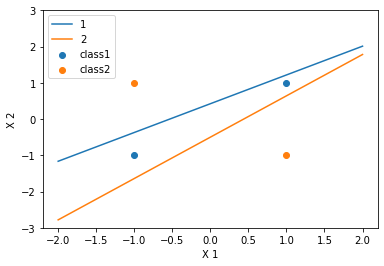

line 1 :
w_x: -1.1498726877718881 w_y: 1.448520799773351
bias: -0.613901931204726
line 2 :
w_x: 1.405746303961195 w_y: -1.232252152905153
bias: -0.6151815840320798


In [19]:
num_of_nodes = 2
learning_rate = 0.5
epochs = 50
w, b = MRI(num_of_nodes, learning_rate, epochs)
plot_classes_with_lines(w, b, num_of_nodes)
for i in range(num_of_nodes):
    print('line',str(i+1),':')
    print('w_x:', w[i],'w_y:', w[i+num_of_nodes])
    print('bias:', b[i])

### test2: my data

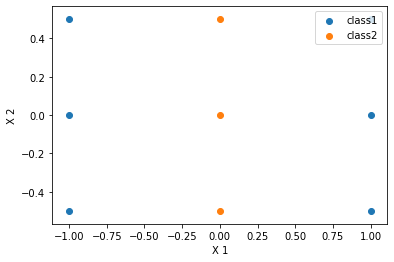

In [20]:
#my data
x1 = np.array([1,1,1,-1,-1,-1])
y1 = np.array([-0.5,0,0.5,-0.5,0,0.5])
x2 = np.array([0,0,0])
y2 = np.array([-0.5,0,0.5])
target_ = np.array([1,1,1,1,1,1,-1,-1,-1])
plot_datas(x1,y1,x2,y2)

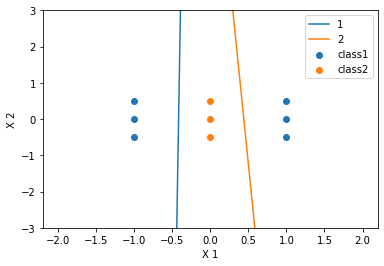

line 1 :
w_x: -1.5782654153153257 w_y: 0.012845660344514842
bias: -0.6587586341489062
line 2 :
w_x: 1.7694867473874467 w_y: 0.08528529990114903
bias: -0.7780152773775615


In [22]:
num_of_nodes = 2
learning_rate = 0.8
epochs = 50
w, b = MRI(num_of_nodes, learning_rate, epochs)
plot_classes_with_lines(w, b, num_of_nodes)
for i in range(num_of_nodes):
    print('line',str(i+1),':')
    print('w_x:', w[i],'w_y:', w[i+num_of_nodes])
    print('bias:', b[i])